In [1]:
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv("datasets/marketing-campaign.csv")

data.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


#### Data discovery

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [11]:
# too much duplicated rows, but its okay in a numerice dataset

data.duplicated().sum()

453503

#### Lower column names

In [14]:
data.columns = [column.lower() for column in data]

#### Date Analyze

In [15]:
data.describe()

,age,gender,impressions,clicks,signed_in
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


In [23]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 110]
labels = ["< 18", "18 - 24", "25 - 34", "35 - 44", "45 - 54", "55 - 64", "65 <"]

data["age_group"] = pd.cut(data["age"], age_bins, labels = labels, include_lowest = True)

data.sample(5)



,age,gender,impressions,clicks,signed_in,age_group
4614,54,1,8,0,1,45 - 54
414094,28,0,2,0,1,25 - 34
271163,0,0,6,0,0,< 18
320719,62,0,9,0,1,55 - 64
120967,73,0,2,0,1,65 <


<Axes: xlabel='age_group', ylabel='count'>

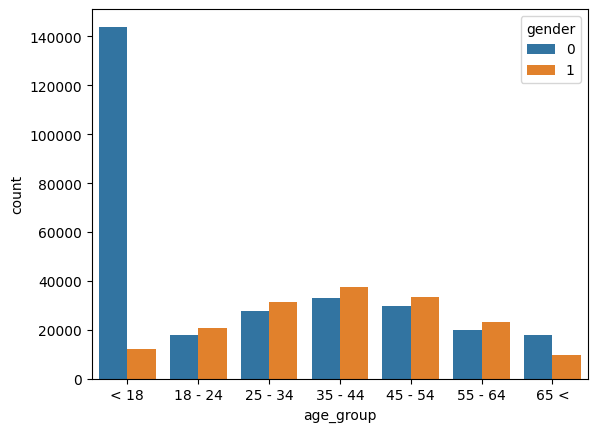

In [24]:
sns.countplot(data = data, x = "age_group", hue = "gender")

<Axes: xlabel='clicks', ylabel='count'>

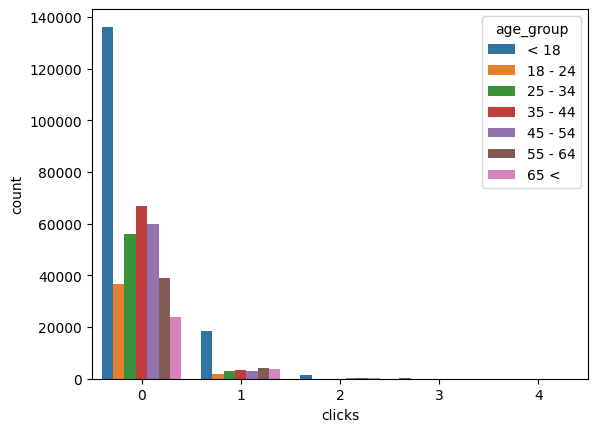

In [25]:
sns.countplot(data = data, x = "clicks", hue = "age_group")

In [28]:
# any users clicked on ad with no impressions?

data[(data["clicks"] > 0) & (data["impressions"] == 0)]

,age,gender,impressions,clicks,signed_in,age_group


<Axes: xlabel='impressions', ylabel='Count'>

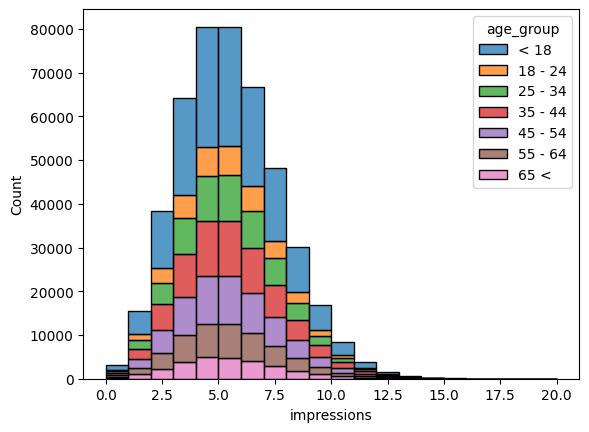

In [32]:
sns.histplot(data = data, x = "impressions", hue = "age_group", stat = "count", binwidth = 1, multiple = "stack")

<Axes: xlabel='age_group', ylabel='impressions'>

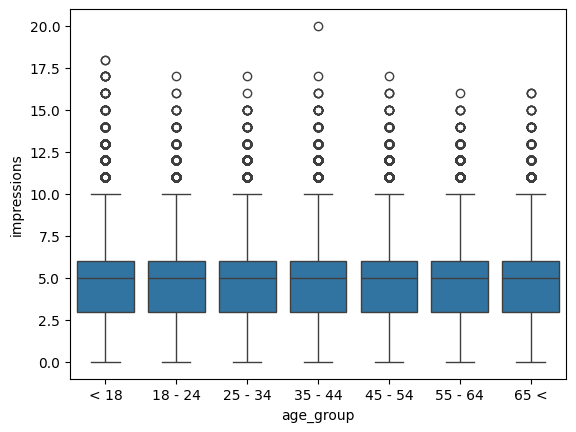

In [33]:
sns.boxplot(data = data, y = "impressions", x = "age_group")

In [61]:
# calculate clicks to impressions

data["ctr"] = round(data["clicks"] / data["impressions"], 5)

data[data["clicks"] > 0].sample(5)

,age,gender,impressions,clicks,signed_in,age_group,ctr,ctr_group
421696,0,0,6,1,0,< 18,0.16667,10-20%
342226,0,0,4,1,0,< 18,0.25000,20-40%
453480,0,0,2,1,0,< 18,0.50000,40% <
352695,0,0,7,1,0,< 18,0.14286,10-20%
24066,69,0,8,1,1,65 <,0.12500,10-20%


<Axes: xlabel='age_group', ylabel='ctr'>

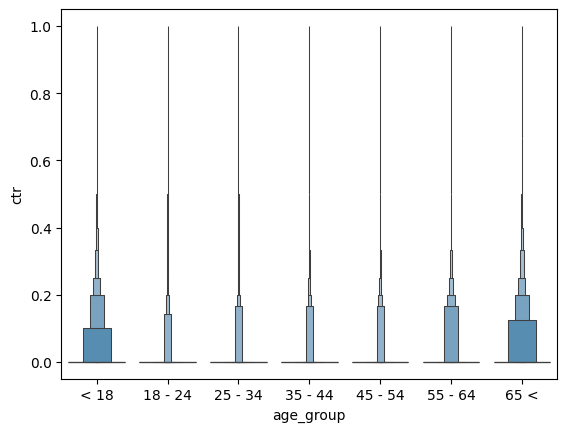

In [51]:
sns.boxenplot(data = data, x = "age_group", y = "ctr")

In [56]:
ctr_bins = [-1, 0, 0.1, 0.2, 0.4, 1]
labels = ["0", "< 10%", "10-20%", "20-40%", "40% <"]

data["ctr_group"] = pd.cut(data["ctr"], ctr_bins, labels = labels)

data.sample(5)

,age,gender,impressions,clicks,signed_in,age_group,ctr,ctr_group
83950,13,1,2,1,1,< 18,0.50000,40% <
315053,0,0,3,1,0,< 18,0.33333,20-40%
342050,44,0,3,0,1,35 - 44,0.00000,0
429402,43,1,3,0,1,35 - 44,0.00000,0
457794,64,1,0,0,1,55 - 64,NaN,NaN


In [58]:
# focus the campaign on the users in 10-40% bins can be effective

data["ctr_group"].value_counts(normalize = True, sort = True)

ctr_group
0         0.912516
10-20%    0.054654
20-40%    0.023328
< 10%     0.004996
40% <     0.004506
Name: proportion, dtype: float64

In [73]:
clicked_data = data[data["clicks"] > 0]

clicked_data["age_group"].value_counts(normalize = True)

age_group
< 18       0.505723
55 - 64    0.106757
65 <       0.099152
35 - 44    0.090190
45 - 54    0.079397
25 - 34    0.073297
18 - 24    0.045484
Name: proportion, dtype: float64

<Axes: xlabel='age_group', ylabel='ctr'>

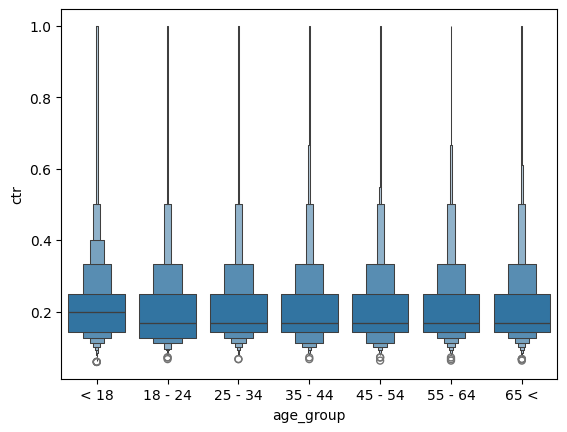

In [74]:
sns.boxenplot(data = clicked_data, x = "age_group", y = "ctr")

<Axes: xlabel='age_group', ylabel='count'>

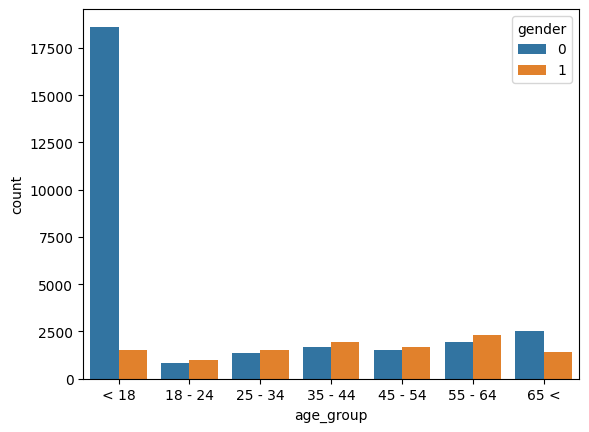

In [75]:
sns.countplot(data = clicked_data, x = "age_group", hue = "gender")

<Axes: xlabel='age_group', ylabel='count'>

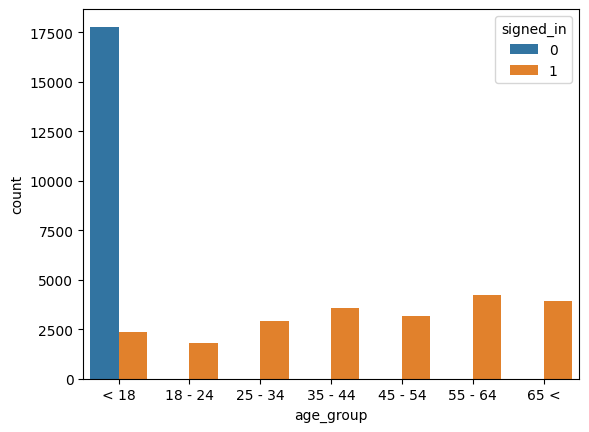

In [76]:
sns.countplot(data = clicked_data, x = "age_group", hue = "signed_in")